**1. Up Sampling**

**2. Down Sampling**



In [5]:
# let's create a database'
import numpy as np
import pandas as pd

# A seed is an initial value used to initialize a random number generator.
# Whenever we generate random number with seed the numbers will be same
# and can be useful for debugging
np.random.seed(123)

#Create dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples*class_0_ratio)
n_class_1 = n_samples - n_class_0

In [6]:
n_class_0,n_class_1

(900, 100)

**np.random.normal()** function in NumPy is used to generate random numbers from a normal (Gaussian) distribution.
loc (float): The mean (center) of the normal distribution.
Default value: 0.0.

scale (float):
The standard deviation (spread or width) of the normal distribution.
Default value: 1.0.
   
size (int or tuple of ints):
The number of random samples to generate.

In [19]:
# Let's create imbalanced dataset with two features
#class_0 = 900 data points, class_1 = 100 data points
class_0=pd.DataFrame({
    'feature1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target' : [0]*n_class_0
})
class_1=pd.DataFrame({
    'feature1':np.random.normal(loc=0,scale=1,size=n_class_1),
    'feature2':np.random.normal(loc=0,scale=1,size=n_class_1),
    'target' : [1]*n_class_1
})


In [20]:
# merge both dataframes into one
df = pd.concat([class_0,class_1]).reset_index(drop=True)

In [21]:
df['target'].value_counts()

,count
target,
0,900
1,100


In [28]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

**1. Upsampling**

**Sklearn library will be used**

In [29]:
from sklearn.utils import resample

In [31]:
df_minority_updated = resample(
    df_minority,
    replace=True,
    n_samples=len(df_majority),
    random_state=42
)

resample(input_data, replace=True: sample wth replacement means same data points can be used multiple times, N-samples=size, random_state=seed to generate same data points every time)

In [33]:
df_minority_updated.shape

(900, 3)

In [38]:
# we can concat upsampled data with minority data
df_upsampled = pd.concat([df_majority,df_minority_updated])
df_upsampled['target'].value_counts()

,count
target,
0,900
1,900


**2. Down Sampling** we can make replace=False as we want to reduce data points

In [41]:
df_majority_updated = resample(
    df_majority,
    replace =False,
    n_samples=len(df_minority),
    random_state=42
)

In [42]:
df_majority_updated.shape

(100, 3)

**3. SMOTE**

In [43]:
#let's use sklearn library to create dataset
from sklearn.datasets import make_classification

In [47]:
X,y=make_classification(
    n_samples=1000, n_redundant=0,n_features=2,n_clusters_per_class=1,
    weights=[0.9], #make is 90 more then minority
    random_state=12
)

In [48]:
import pandas as pd
df1 = pd.DataFrame(X,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
df = pd.concat([df1,df2],axis=1)
df.head(2)

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0


In [49]:
df['target'].value_counts()

,count
target,
0,900
1,100


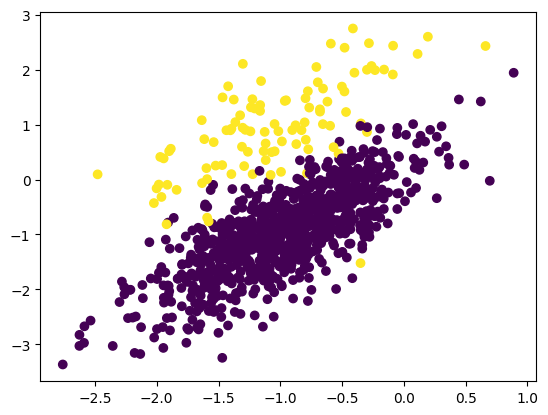

In [52]:
import matplotlib.pyplot as plt
plt.scatter(df['f1'],df['f2'],c=df['target'])

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
# transform the data
oversample = SMOTE()
X,y = oversample.fit_resample(df[['f1','f2']],df['target'])

In [55]:
X.shape

(1800, 2)

In [56]:
y.shape

(1800,)

In [57]:
do1 = pd.DataFrame(X,columns=['f1','f2'])
do2 = pd.DataFrame(y,columns=['target'])
oversample_df = pd.concat([do1,do2],axis=1)


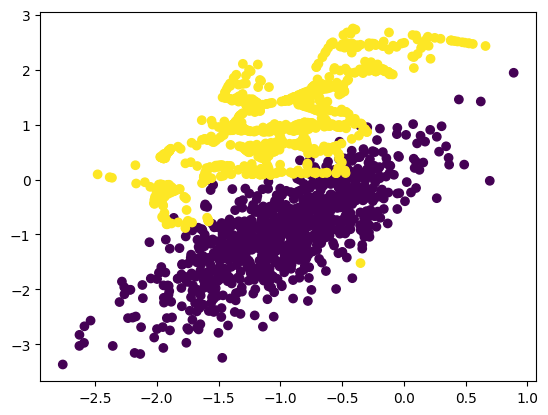

In [58]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])